## 1. 模型介绍

线性回归是一种通过特征的线性组合来预测目标的线性模型。
它的目的是找到一条线或一个超平面，使预测值和真实值之间的差距最小化。

### 1.1 数学表达
这条直线的方程为：
$$
f(\mathbf{x}) = w_1x_1+w_2x_2+...+w_dx_d+b
$$
- 其中 $\mathbf{x}=(x_1;x_2;...;x_d)$ 代表一个样本， $x_i$ 表示该样本第 $i$ 个特征， $b$ 表示偏置， $f(\mathbf{x})$ 表示样本 $\mathbf{x}$ 对应的预测值  
- 若样本的特征向量重写为$\mathbf{x}=(x_1;x_2;...;x_d;1)$，并且模型参数重写为$\mathbf{\omega}=(w_1;w_2;...;w_d;b)$，则多元线性回归模型可以简化为：

$$
f(\mathbf{x}) = \mathbf{\omega}^T\mathbf{x}
$$

### 1.2 损失函数
模型的目标是确定$\omega$和$b$，从而拟合出一条直线。如何确定$\omega$和$b$？关键在于如何衡量 $f(\mathbf{x})$ 和 $\mathbf{y}$ 之间的差别。
- 选择均方误差作为损失函数，最小化预测值与实际观测值之间的平方差，其数学公式如下：
$$J\left( \omega\right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{f}}\left({{\mathbf{x}^i}}\right)-{{\mathbf{y}^i}} \right)}^{2}}}
$$
其中，$\omega$是权重，m是样本数量

### 1.3 Batch Gradient Decent（批量梯度下降）

$${{w }_{j}}:={{w }_{j}}- \alpha \frac{1}{m}\sum\limits_{i=1}^m \frac{\partial }{\partial {{w}_{j}}}J\left( w \right):={{w }_{j}}- \frac{\alpha}{m} X_j^T(f(X)-Y)$$

注意：这里 $X_j$代表所有样本第$j$个特征组成的向量，大小为$m\times1$，$f(X)$代表所有样本的预测值, $Y$为所有样本的预测值，大小为$m\times1$。 $\alpha$表示学习率

写成矩阵的形式：
$${W}:={W}- \alpha dW:=W-\frac{\alpha X^T(f(X)-Y)}{m}$$


### 1.4 最大似然估计


#### 1.4.1 似然函数
似然函数是指在给定观测数据的情况下，关于模型参数的概率分布函数。假设我们有一个参数化的概率分布模型，其参数记为 
$θ$。给定观测数据 
$X$，似然函数 
$L(θ∣X) $表示参数 
$θ$ 下观测数据 
$X$ 出现的概率密度（连续型数据）或概率质量（离散型数据）。
数学表示为：
$$ L(θ∣X)=f(X∣θ)=𝑓(x_1,…,x_𝑛 |\theta)=𝑓(x_1 |\theta)𝑓(x_2 |\theta)⋯𝑓(x_n |\theta)=∏_{i=1}^n𝑓(x_i |\theta) $$
- 其中，
$f(X∣θ)$ 是给定参数 
$θ$ 下观测数据 
$X$ 的概率密度函数（或概率质量函数）

#### 1.4.2 最大似然估计
最大似然估计是一种常用的参数估计方法，其核心思想是寻找能使观测数据的似然函数取得最大值的参数值。换言之，MLE 通过最大化观测数据的似然函数，来估计模型的参数。
此模型中，假设：
$$y =\hat{y}+ \epsilon$$
其中，$\epsilon$是误差项，假设$\epsilon$服从均值为0的正态分布，即$\epsilon \sim N(0, \sigma^2)$。我们可以得到：
$$y \sim N(\hat{y}, \sigma^2)$$
似然函数：
$$
L=\prod_{i=1}^{m}f(x_i|\theta) = \prod_{i=1}^{m}\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y_i - \hat{y}_i)^2}{2\sigma^2})
$$
对似然函数取对数，得到对数似然函数：
$$\ln L= -\frac{m}{2}log(2\pi) - mlog(\sigma) - \frac{1}{2\sigma^2}\sum_{i=1}^{m}(y_i - \hat{y}_i)^2$$
对对数似然函数求导，可得：
$$\nabla\ln L=\frac{1}{\sigma^2}\sum_{i=1}^{m}(y_i - \hat{y}_i)^2=\frac{1}{\sigma^2}\sum_{i=1}^{m}( -w^Tx_i+t_i)x^T_i=0$$
可以求得参数：
$$\omega=(xx^T)^{-1}xt^T$$
可以看出，最大似然估计的结果与线性回归的结果相同，这进一步证明了线性回归中误差的高斯假设。

### 1.5 正则化
正则化是一种常用的机器学习技术，用于控制模型的复杂度以防止过拟合。在正则化中，通常会在模型的损失函数中引入额外的项，以对模型参数进行惩罚或约束，从而限制模型的复杂度。

#### 1.5.1 原理
正则化的核心思想是在最小化损失函数的同时，限制模型参数的大小。通过对模型参数进行惩罚，可以防止模型过度拟合训练数据的噪声和细节。正则化通常会在损失函数中添加一个正则化项，该项会随着模型参数的增大而增大，从而约束参数的大小。

#### 1.5.2 常见的正则化方法
在线性回归等线性模型中，常见的两种正则化方法是 L1 正则化和 L2 正则化：
- L1 正则化（Lasso Regression）：在损失函数中添加模型参数的绝对值之和作为正则化项。它倾向于产生稀疏的模型，即将某些参数压缩为零，实现特征选择的作用。

- L2 正则化（Ridge Regression）：在损失函数中添加模型参数的平方和作为正则化项。它倾向于减小参数的大小，但不会将参数压缩为零，因此不能实现特征选择的作用。

#### 1.5.3. 正则化的优势和应用：
- **防止过拟合**：正则化可以帮助防止模型在训练数据上过度拟合，提高模型的泛化能力，使其在未见过的数据上表现更好。

- **解决共线性问题**：正则化可以帮助解决特征间存在共线性（线性相关）的问题，从而提高模型的稳定性和可解释性。

- **特征选择**：L1 正则化可以实现特征选择，将不重要的特征的系数压缩为零，从而简化模型并提高其解释性。

故而在损失函数中添加正则化项，在本线性回归模型中选择L2范数，
$$J\left( \omega\right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{f}}\left({{\mathbf{x}^i}}\right)-{{\mathbf{y}^i}} \right)}^{2}}}+\Vert w \Vert_2
$$
其中，$\Vert w \Vert_2$为L2范数，那么
$$
\begin{aligned}
\frac{\partial(\boldsymbol{w}^T\boldsymbol{w})}{\partial\boldsymbol{w}} & = \frac{\partial(w_1^2+w_2^2+\cdots+w_n^2)}{\partial\boldsymbol{w}}\\\\& = \begin{bmatrix}\frac{\partial(w_1^2+w_2^2+\cdots+w_n^2)}{\partial w_1}\\\frac{\partial(w_1^2+w_2^2+\cdots+w_n^2)}{\partial w_2}\\\varvdots\\\frac{\partial(w_1^2+w_1^2+\cdots+w_n^2)}{\partial w_n}\end{bmatrix}\\\\\\ & = \begin{bmatrix}2w_1\\2w_2\\\varvdots\\2w_n\end{bmatrix}\\\\ & = 2\begin{bmatrix}w_1\\w_2\\\varvdots\\w_n\end{bmatrix}\\\\ & = 2\boldsymbol{w}
\end{aligned}
$$
则加入正则项后的梯度公式为
$$
\frac{\partial J}{\partial w}=\lambda\boldsymbol{w}+\alpha \frac{1}{m}\sum_{i=1}^{m}x_i(y^i-\mathbf{x}^i)
$$
最后就可以使用该梯度公式和梯度下降算法更新参数。

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from matplotlib import rcParams  ## run command settings for plotting
from sklearn.model_selection import train_test_split

In [202]:
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号，大家自行调节
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)  ## 设置画图的一些参数

In [203]:
## 读取数据
path = 'D:/My_files_in_GZU/学习/大二/机器学习/machine-learning/3rd_homework/regress_data1.csv'
data = pd.read_csv(path) ## data 是dataframe 的数据类型
data.head(15) # 返回data中的前几行数据，默认是前5行。  

,人口,收益
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
5,8.3829,11.88600
6,7.4764,4.34830
7,8.5781,12.00000
8,6.4862,6.59870
9,5.0546,3.81660


In [204]:
cols = data.shape[1]
X_data = data.iloc[:,:cols-1]#X是所有行，去掉最后一列， 未标准化
y_data = data.iloc[:,cols-1:]#X是所有行，最后一列

In [205]:
data.describe() ## 查看数据的统计信息

,人口,收益
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


看下数据长什么样子，进行画图

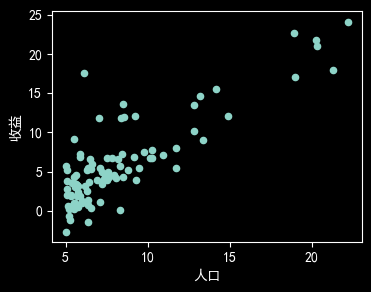

In [206]:
data.plot(kind='scatter', x='人口', y='收益', figsize=(4,3)) # 利用散点图可视化数据
import matplotlib
plt.xlabel('人口')
plt.ylabel('收益', rotation=90)
plt.show()

# 数据归一化

数据划分，运用train_test_split函数采用随机划分的方法

In [207]:
# 使用 train_test_split 函数划分数据集
# test_size 指定测试集的比例，例如 0.2 表示 20% 的数据作为测试集
# random_state 是随机种子，保证每次划分结果的一致性
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)


数据进行归一化处理

In [208]:
data_min=np.min(X_train)# 计算每个特征的最小值
data_max=np.max(X_train)

data_mean=np.mean(X_train)
data_variance=np.var(X_train,axis=0)

X_train=(X_train-data_min)/(data_max-data_min)
X_test=(X_test-data_min)/(data_max-data_min)

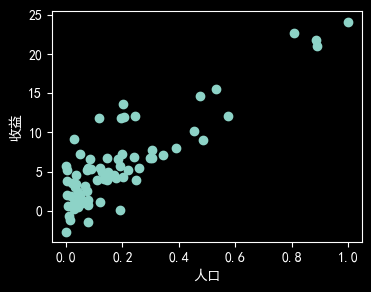

In [209]:
plt.figure(figsize=(4,3))
plt.scatter(X_train,y_train,) # 利用散点图可视化数据
plt.xlabel('人口')
plt.ylabel('收益', rotation=90)
plt.show()

进行数据归一化处理后，数据的分布基本不变，但是数据的范围变小，大致范围是(0, 1)

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。测试集中也添加一列，以使和W矩阵相乘时维度匹配

In [210]:
X_train.insert(0, 'Ones', 1)
X_test.insert(0, 'Ones', 1)

从数据中分离出特征属性X和目标向量Y，并对模型参数进行初始化，同时计算当前的损失。

观察下 X (训练集) and y (目标变量)是否正确.

In [211]:
X_train.head()#head()是观察前5行

,Ones,人口
49,1,0.029966
70,1,0.297454
68,1,0.027509
15,1,0.020523
39,1,0.077229


In [212]:
y_train.head()

,收益
49,1.0179
70,6.6799
68,1.0173
15,3.5129
39,5.4974


代价函数是应该是numpy数组，所以我们需要从dataframeX_data和Y_data中读取数据，然后才能使用它们。
此外，我们还需要初始化w。

In [213]:
X=X_train.values
Y=y_train.values
W=np.array([[0.0],[0.0]]) ## 初始化W系数矩阵，w 是一个(2,1)矩阵

看下维度

In [214]:
(X_train.shape,Y.shape, W.shape)

((77, 2), (77, 1), (2, 1))

注意***，根据维度，我们写出线性回归的模型：Y=np.dot(X,W) 也就是说  (m,n) @ (n, 1) -> (m, 1),
则线性回归模型写为：$${{f}}\left( X\right)=XW$$
因此，我们定义模型的损失函数为：$$ loss =\frac{(XW-Y)^T(XW-Y)}{2m}$$


In [215]:
def computeCost(X, Y, W, lambda_val):
    m = X.shape[0]
    Y_hat = np.dot(X, W)
    loss = np.sum((Y_hat - Y) ** 2) / (2 * m)  # 计算普通损失

    # 加上L2正则化项
    regularization_term = (lambda_val / (2 * m)) * np.sum(W ** 2)
    loss += regularization_term

    return loss

# Batch Gradient Decent（批量梯度下降）

$${{w }_{j}}:={{w }_{j}}- \alpha \frac{1}{m}\sum\limits_{i=1}^m \frac{\partial }{\partial {{w}_{j}}}J\left( w \right):={{w }_{j}}- \frac{\alpha}{m} X_j^T(f(X)-Y)$$

注意：这里 $X_j$代表所有样本第$j$个特征组成的向量，大小为$m\times1$，$f(X)$代表所有样本的预测值, $Y$为所有样本的预测值，大小为$m\times1$。 

写成矩阵的形式：
$${W}:={W}- \alpha dW:=W-\frac{\alpha X^T(f(X)-Y)}{m}$$




In [216]:
def gradientDescent(X, Y, W, alpha):
    num_train = X.shape[0]     
    Y_hat = np.dot(X,W)        
    dW = X.T@(Y_hat-Y)/ X.shape[0]
#     dW = X.T@(Y_hat-Y)
    W += -alpha * dW
    return W

In [217]:
def linearRegression(X_train,y_train, alpha, iters,X_test,y_test):
    loss_test = []
    loss_train = []
    # step1: initialize the model parameters
    feature_dim = X.shape[1]
    W=np.zeros((feature_dim,1)) ## 初始化W系数矩阵，w 是一个(feature_dim,1)矩阵
    ## repeat step 2 and step 3 untill to the convergence or the end of iterations
    for i in range (iters):
        # step2 : using the initilized parameters to predict the output and calculate the loss   
        loss = computeCost(X_train,y_train,W,0.1)
        loss_train.append(loss)
        loss = computeCost(X_test,y_test,W,0.1)
        loss_test.append(loss)
        # step3: using the gradient decent method to update the parameters 
        W=gradientDescent(X_train, y_train, W, alpha)
    return loss_train,loss_test, W ## 返回损失和模型参数。
    

In [218]:
def linearRegression_lsq(X, y):# 不需要学习率和迭代次数
    """
    使用最小二乘法（LSQ）求解线性回归模型参数
    
    参数：
    X: numpy数组，包含样本特征数据，形状为 (n_samples, n_features)
    y: numpy数组，目标变量数据，形状为 (n_samples,)
    
    返回：
    beta: numpy数组，模型参数向量，形状为 (n_features,)
    """
    
    # 使用正规方程求解模型参数
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return beta

In [219]:
def predict(X, W):
    '''
    输入：
        X：测试数据集
        W：模型训练好的参数
    输出：
        y_pre：预测值
    '''
    y_pre = np.dot(X,W)
    return y_pre

In [220]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((77, 2), (77, 1), (20, 2), (20, 1))

In [239]:
alpha =0.1
iters = 10000
loss_train,loss_test, W = linearRegression(X_train,y_train, alpha, iters,X_test,y_test)

为什么必须要用W['收益']才能访问到呢？这样的话W不就是字典了吗？但是我一开始没有定义为字典呀

In [240]:
W['收益'],loss_train,loss_test

(Ones     1.739881
 人口      22.114723
 Name: 收益, dtype: float64,
 [收益    31.333604
  dtype: float64,
  收益    27.80034
  dtype: float64,
  收益    24.944014
  dtype: float64,
  收益    22.631939
  dtype: float64,
  收益    20.757456
  dtype: float64,
  收益    19.234835
  dtype: float64,
  收益    17.995164
  dtype: float64,
  收益    16.983052
  dtype: float64,
  收益    16.153975
  dtype: float64,
  收益    15.472145
  dtype: float64,
  收益    14.908797
  dtype: float64,
  收益    14.440806
  dtype: float64,
  收益    14.049588
  dtype: float64,
  收益    13.720202
  dtype: float64,
  收益    13.440641
  dtype: float64,
  收益    13.201251
  dtype: float64,
  收益    12.994274
  dtype: float64,
  收益    12.813472
  dtype: float64,
  收益    12.653832
  dtype: float64,
  收益    12.511324
  dtype: float64,
  收益    12.382706
  dtype: float64,
  收益    12.265375
  dtype: float64,
  收益    12.157235
  dtype: float64,
  收益    12.056602
  dtype: float64,
  收益    11.962123
  dtype: float64,
  收益    11.872708
  dtype: float64,


现在我们来绘制线性模型以及数据，直观地看出它的拟合。

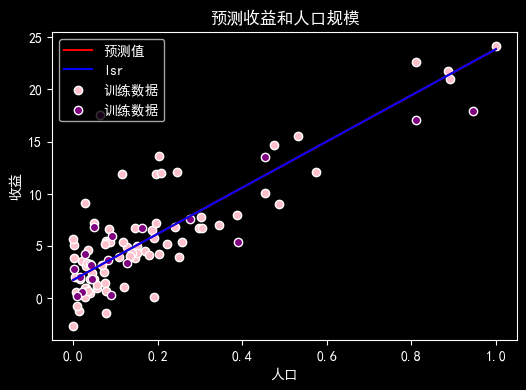

In [244]:
x = np.linspace(X_train['人口'].min(), X_train['人口'].max(), 100)
f = W['收益'][0] + (W['收益'][1] * x)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f, 'r', label='预测值')

W = linearRegression_lsq(X_train,y_train)
x = np.linspace(X_train['人口'].min(), X_train['人口'].max(), 100)
f = W['收益'][0] + (W['收益'][1] * x)

ax.plot(x, f, 'blue', label='lsr')

ax.scatter(X_train['人口'], y_train['收益'],label='训练数据',color='pink',edgecolors='white')
ax.scatter(X_test['人口'], y_test['收益'],label='训练数据',color='purple',edgecolors='white')
ax.legend(loc=2)
ax.set_xlabel('人口' )
ax.set_ylabel('收益', rotation=90)
ax.set_title('预测收益和人口规模')
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

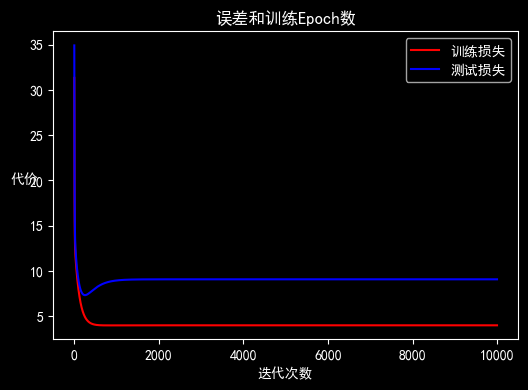

In [245]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(np.arange(iters), loss_train, 'red',label='训练损失')
ax.plot(np.arange(iters), loss_test, 'blue',label='测试损失')
ax.legend()
ax.set_xlabel('迭代次数')
ax.set_ylabel('代价', rotation=0)
ax.set_title('误差和训练Epoch数')
plt.show()